In [91]:
import pandas as pd
import numpy as np
import datetime
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [3]:
train_data_original = pd.read_csv("./data/train.csv.zip")
test_data = pd.read_csv("./data/test.csv.zip")

train_data = train_data_original.copy(deep=True)
data_cleaner = [train_data, test_data]

In [4]:
train_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
test_data.tail()

,id,date,store,item
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50
44999,44999,2018-03-31,10,50


In [99]:
# folder for all the graphs
graphs_directory = os.path.dirname('./graphs/')
if not os.path.exists(graphs_directory):
    os.makedirs(graphs_directory)
    print("made a directory for graphs")

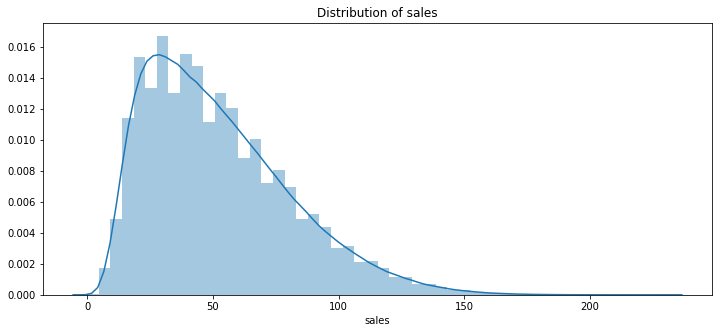

In [98]:
plt.figure(figsize=(12,5))
plt.title('Distribution of sales')
sales_dist = sns.distplot(train_data['sales'])
sales_dist.get_figure().savefig('./graphs/distribution_of_sales.png')

In [8]:
for data in data_cleaner:
    data['Datetime_date'] = data['date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
for data in data_cleaner:
    data['year'] = data['Datetime_date'].map(lambda x: x.year)
    data['month'] = data['Datetime_date'].map(lambda x: x.month)
    data['day'] = data['Datetime_date'].map(lambda x: x.day)

In [10]:
print(train_data['store'].unique().tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [11]:
print(train_data['item'].unique().tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


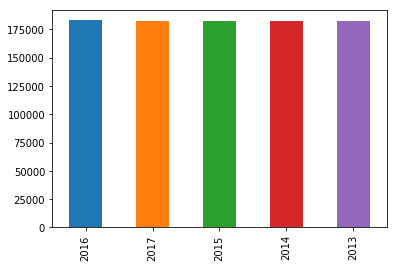

In [100]:
year_value_counts = train_data['year'].value_counts().plot.bar()
year_value_counts.get_figure().savefig('./graphs/year_value_counts.png')

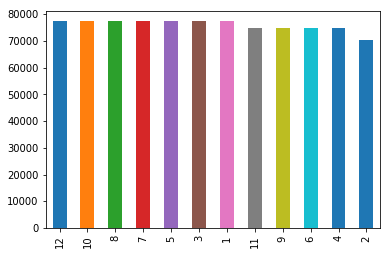

In [101]:
month_value_counts = train_data['month'].value_counts().plot.bar()
month_value_counts.get_figure().savefig('./graphs/month_value_counts')

In [16]:
# get a list of us federal holidays as a datetime object
from pandas.tseries.holiday import USFederalHolidayCalendar
days_off = USFederalHolidayCalendar().holidays(start='2013-01-01', end='2017-12-27').to_pydatetime()

In [17]:
for data in data_cleaner:
    data['weekday'] = data['Datetime_date'].map(lambda x: x.dayofweek)
    data['week_of_year'] = data['Datetime_date'].map(lambda x: x.weekofyear)
    data['isWeekend'] = data['weekday'].map(lambda x: 1 if (x==6 or x==5) else 0)
    data['isHoliday'] = data['Datetime_date'].map(lambda x: 1 if (x in days_off) else 0)

In [18]:
# for each store count the sales
train_data['store_sales_sum'] = train_data.groupby(by=['store'])['sales'].transform('sum')
unique_total_sales = train_data['store_sales_sum'].unique().tolist()
test_data['store_sales_sum'] = test_data['store'].map(lambda x: unique_total_sales[x-1])
test_data.tail()

,id,date,store,item,Datetime_date,year,month,day,weekday,week_of_year,isWeekend,isHoliday,store_sales_sum
44995,44995,2018-03-27,10,50,2018-03-27,2018,3,27,1,13,0,0,5360158
44996,44996,2018-03-28,10,50,2018-03-28,2018,3,28,2,13,0,0,5360158
44997,44997,2018-03-29,10,50,2018-03-29,2018,3,29,3,13,0,0,5360158
44998,44998,2018-03-30,10,50,2018-03-30,2018,3,30,4,13,0,0,5360158
44999,44999,2018-03-31,10,50,2018-03-31,2018,3,31,5,13,1,0,5360158


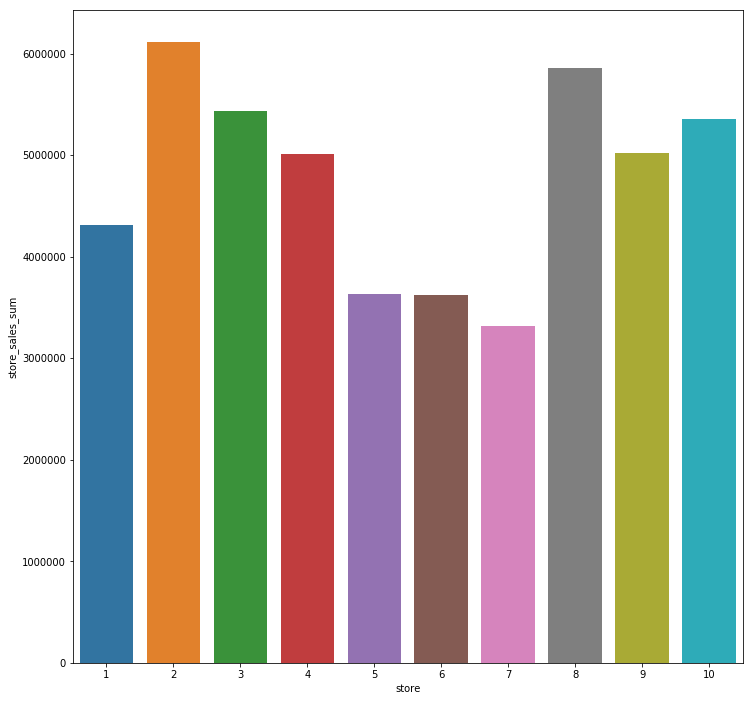

In [102]:
plt.figure(figsize=(12,12))
store_and_sales_bar = sns.barplot(x='store', y='store_sales_sum', data=train_data)
store_and_sales_bar.get_figure().savefig('./graphs/store_and_sales_bar.png')

In [79]:
# for each store count the sales
train_data['item_sales_sum'] = train_data.groupby(by=['item'])['sales'].transform('sum')
unique_total_sales = train_data['item_sales_sum'].unique().tolist()
test_data['item_sales_sum'] = test_data['item'].map(lambda x: unique_total_sales[x-1])
test_data.tail()

,id,date,store,item,Datetime_date,year,month,day,weekday,week_of_year,isWeekend,isHoliday,store_sales_sum,store_monthly_sales_sum,store_item_sales_sum,store_item_sales_median,item_sales_sum
44995,44995,2018-03-27,10,50,2018-03-27,2018,3,27,1,13,0,0,5360158,279302,3868,24.0,1203009
44996,44996,2018-03-28,10,50,2018-03-28,2018,3,28,2,13,0,0,5360158,279302,3868,24.0,1203009
44997,44997,2018-03-29,10,50,2018-03-29,2018,3,29,3,13,0,0,5360158,279302,3868,24.0,1203009
44998,44998,2018-03-30,10,50,2018-03-30,2018,3,30,4,13,0,0,5360158,279302,3868,24.0,1203009
44999,44999,2018-03-31,10,50,2018-03-31,2018,3,31,5,13,1,0,5360158,279302,3868,24.0,1203009


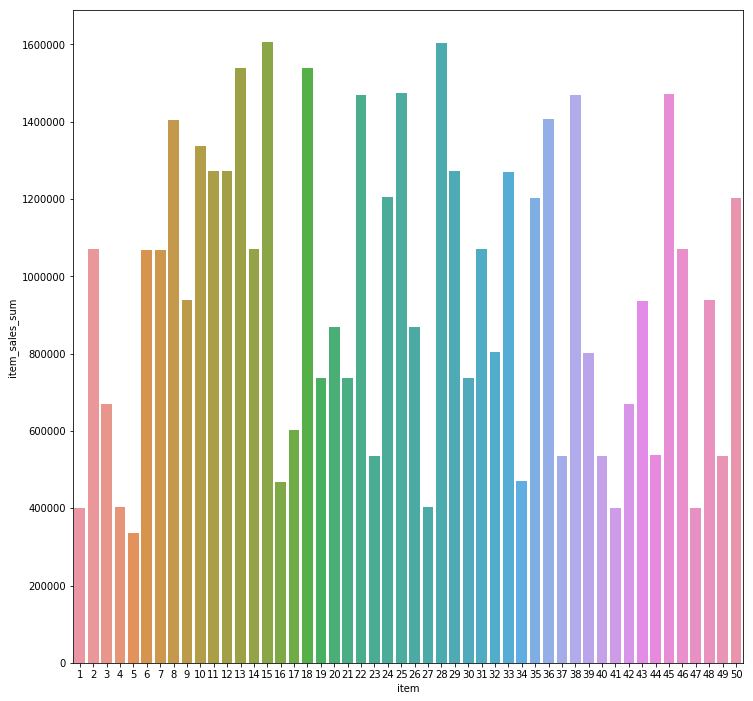

In [103]:
plt.figure(figsize=(12,12))
items_and_sales_sum_bar = sns.barplot(x='item', y='item_sales_sum', data=train_data)
items_and_sales_sum_bar.get_figure().savefig('./graphs/items_and_sales_sum_bar.png')

In [21]:
# for each store count the sales
train_data['store_monthly_sales_sum'] = train_data.groupby(by=['month', 'store'])['sales'].transform('sum')
print(f'There are 12 months and 10 stores thus, {12*10} items.')
unique_total_sales_per_month = train_data['store_monthly_sales_sum'].unique().tolist()
print(f'see here: {len(unique_total_sales_per_month)}')

test_data['store_monthly_sales_sum'] = train_data.groupby(by=['month', 'store'])['sales'].transform('sum')
print(len(test_data['store_monthly_sales_sum'].unique().tolist()))
test_data.head()

There are 12 months and 10 stores thus, 120 items.
see here: 120
120


,id,date,store,item,Datetime_date,year,month,day,weekday,week_of_year,isWeekend,isHoliday,store_sales_sum,store_monthly_sales_sum
0,0,2018-01-01,1,1,2018-01-01,2018,1,1,0,1,0,0,4315603,249352
1,1,2018-01-02,1,1,2018-01-02,2018,1,2,1,1,0,0,4315603,249352
2,2,2018-01-03,1,1,2018-01-03,2018,1,3,2,1,0,0,4315603,249352
3,3,2018-01-04,1,1,2018-01-04,2018,1,4,3,1,0,0,4315603,249352
4,4,2018-01-05,1,1,2018-01-05,2018,1,5,4,1,0,0,4315603,249352


In [22]:
# for each item in each store count the sales
train_data['store_item_sales_sum'] = train_data.groupby(by=['month', 'item', 'store'])['sales'].transform('sum')
test_data['store_item_sales_sum'] = train_data.groupby(by=['month', 'item', 'store'])['sales'].transform('sum')
test_data.head()

,id,date,store,item,Datetime_date,year,month,day,weekday,week_of_year,isWeekend,isHoliday,store_sales_sum,store_monthly_sales_sum,store_item_sales_sum
0,0,2018-01-01,1,1,2018-01-01,2018,1,1,0,1,0,0,4315603,249352,2125
1,1,2018-01-02,1,1,2018-01-02,2018,1,2,1,1,0,0,4315603,249352,2125
2,2,2018-01-03,1,1,2018-01-03,2018,1,3,2,1,0,0,4315603,249352,2125
3,3,2018-01-04,1,1,2018-01-04,2018,1,4,3,1,0,0,4315603,249352,2125
4,4,2018-01-05,1,1,2018-01-05,2018,1,5,4,1,0,0,4315603,249352,2125


In [23]:
# for each item in each store for each month count the median sales
train_data['store_item_sales_median'] = train_data.groupby(by=['month', 'item', 'store'])['sales'].transform('median')
test_data['store_item_sales_median'] = train_data.groupby(by=['month', 'item', 'store'])['sales'].transform('median')
test_data.head()

,id,date,store,item,Datetime_date,year,month,day,weekday,week_of_year,isWeekend,isHoliday,store_sales_sum,store_monthly_sales_sum,store_item_sales_sum,store_item_sales_median
0,0,2018-01-01,1,1,2018-01-01,2018,1,1,0,1,0,0,4315603,249352,2125,13.0
1,1,2018-01-02,1,1,2018-01-02,2018,1,2,1,1,0,0,4315603,249352,2125,13.0
2,2,2018-01-03,1,1,2018-01-03,2018,1,3,2,1,0,0,4315603,249352,2125,13.0
3,3,2018-01-04,1,1,2018-01-04,2018,1,4,3,1,0,0,4315603,249352,2125,13.0
4,4,2018-01-05,1,1,2018-01-05,2018,1,5,4,1,0,0,4315603,249352,2125,13.0


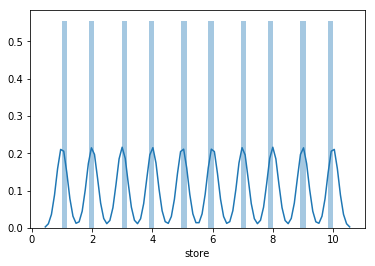

In [104]:
store_distribution_graph = sns.distplot(train_data['store'])
store_distribution_graph.get_figure().savefig('./graphs/store_distribution_graph.png')

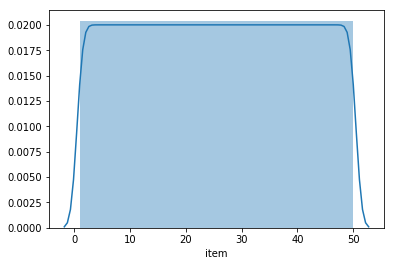

In [106]:
sns.distplot(train_data['item']).get_figure().savefig('./graphs/items_distribution.png')

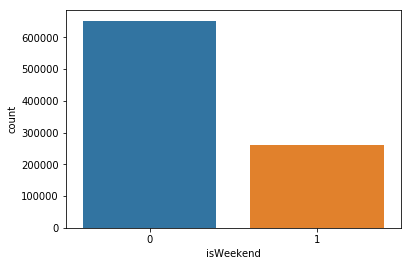

In [108]:
sns.countplot(train_data['isWeekend']).get_figure().savefig('./graphs/count_of_weekends.png')

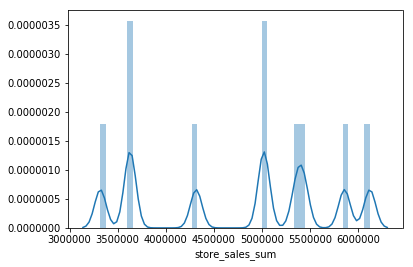

In [109]:
sns.distplot(train_data['store_sales_sum']).get_figure().savefig('./graphs/distribution_of_store_sales_sums.png')

In [49]:
# sns.kdeplot(train_data['store'], train_data['sales'])

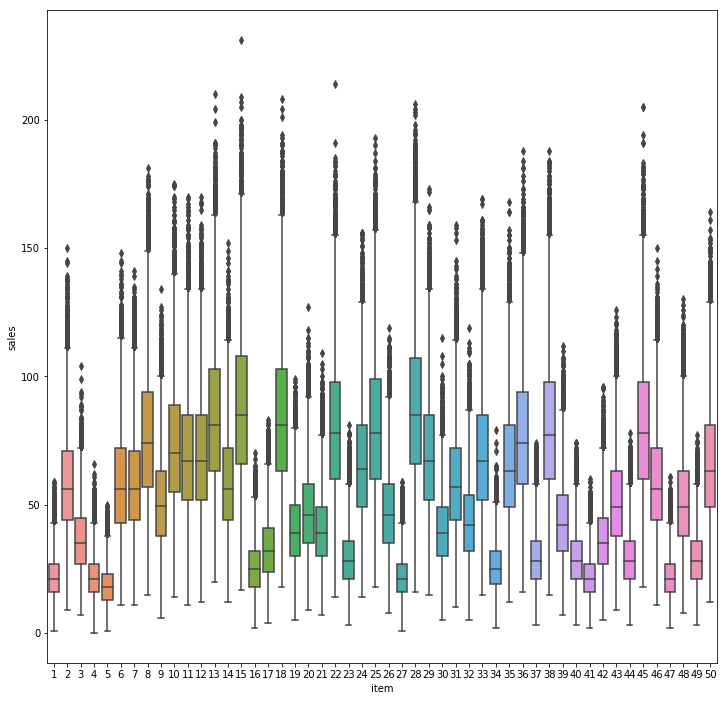

In [111]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='item', y='sales', data=train_data).get_figure().savefig('./graphs/items_sales_boxplot.png')

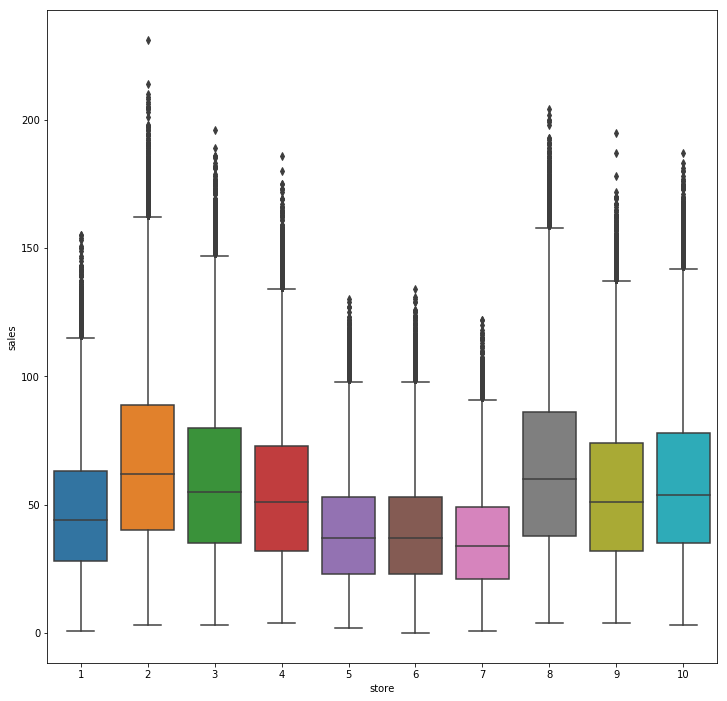

In [112]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='store', y='sales', data=train_data).get_figure().savefig('./graphs/store_sales_boxblot.png')

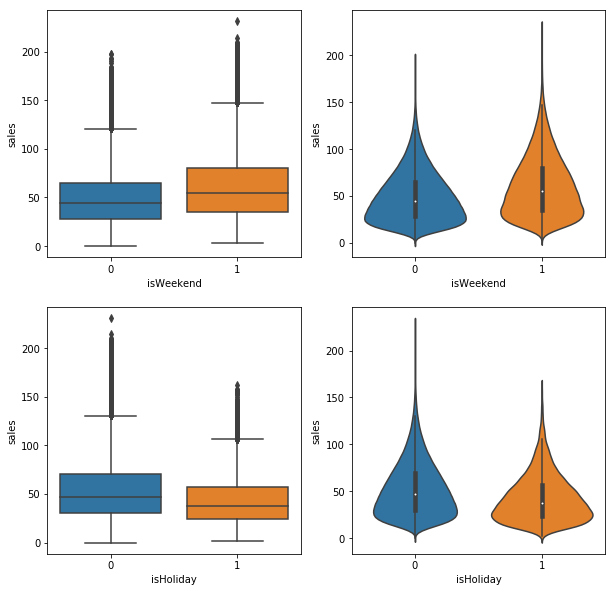

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# isWeekend column
sns.boxplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,0])
sns.violinplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,1])

# isHoliday column
sns.boxplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,0])
sns.violinplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,1])
fig.savefig('./graphs/isWeekend_isHoliday_box_violin_plot.png')

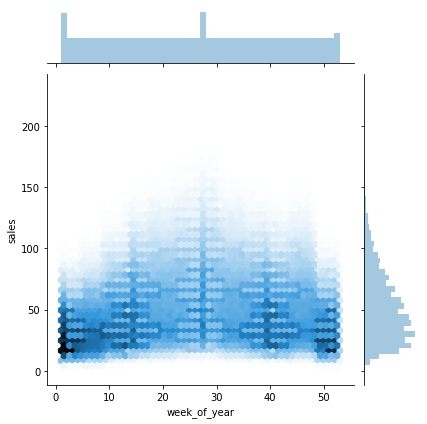

In [119]:
sns.jointplot(x='week_of_year', y='sales', data=train_data, kind='hex').savefig('./graphs/week_of_year_sales_hex.png')

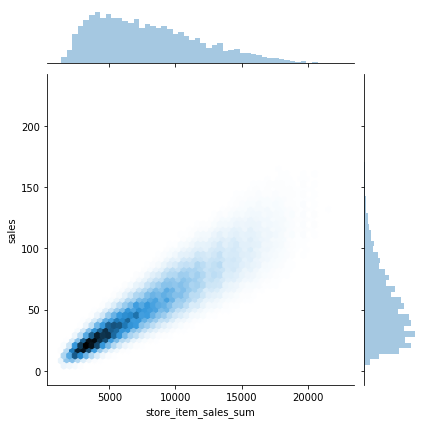

In [124]:
sns.jointplot(x='store_item_sales_sum', y='sales', data=train_data, kind='hex').savefig('./graphs/store_item_sum_sales_hex.png')

# Export processed data

In [122]:
train_data.to_csv('./data/preprocessed_train_data.csv')
test_data.to_csv('./data/preprocessed_test_data.csv')